# Assignment 6

## Searching and weighted graphs

#### Import statements

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#### Weighted adjacency matrix implementation

In [285]:
random.seed(123)
N = 10
#a = np.random.random_integers(1,4,size=(N,N))
a = np.random.randint(1,3,(N,N))
A = (a + a.T)
for i in range(N):
    A[i,i] = 0
    
b = np.random.randint(1,4,size=(N,N))
B = (b + b.T)
for i in range(N):
    B[i,i] = 0

c = np.random.randint(1,4,size=(N,N))
C = (c + c.T)
for i in range(N):
    C[i,i] = 0
Z = np.zeros((N,N), dtype = int)

R1 = np.block([np.block([A,Z]), Z])
R2 = np.block([np.block([Z,B]), Z])
R3 = np.block([np.block([Z,Z]), C])

P = np.zeros((3*N, 3*N), dtype=int)
for i in range(2):
    for j in range(1,3):
        P[8+j-1, (i+1)*N+j] = 1
P = (P+P.T)

M1 = np.block([np.block([R1.T, R2.T]), R3.T]) + P

In [292]:
print(M1)

[[0 4 3 4 4 4 4 3 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 4 2 3 4 4 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 4 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 2 3 0 2 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 3 3 2 0 3 4 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 4 3 3 3 0 3 3 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 4 3 3 4 3 0 2 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 2 3 3 3 3 2 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 2 3 3 4 2 3 3 0 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [4 2 3 3 3 3 4 4 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 5 5 3 5 5 2 4 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 5 0 4 2 4 5 6 3 4 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 5 4 0 2 4 4 6 4 3 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 2 2 0 2 2 4 2 3 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 4 4 2 0 4 5 4 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 5 4 2 4 0 4 3 3 3 0 0 0 0 0 0 0

## Question 1

There are 30 vertices on the graphs that are connected by 139 edges.

There are three fully connected groups of ten vertices with $\sum_{i=1}^9 i = 45$ edges each plus four additional edges connecting groups two and three to group one. $(3\cdot45)+4=139$

## Question 2

### Depth first search implementation

I created a Graph class that takes in an adjacency matrix as an arguments.  The adjacency matrix must first be converted to a graph with the mkGraph function after which DFS can be called.  I included randomization for the time test with mkGraphRand.  This class also includes functions for DAG-shortest-path, Bellman-Ford, and Dijkstra's algorithm.

In [396]:
class Graph():
    
    from random import shuffle
    from time import time
    import numpy as np
    
    def __init__(self, M):
        self.M = M
        
    def mkGraph(self):
        graph = dict()
        for i in range(len(self.M)):
            graph[i] = []
            for j in range (len(self.M[i])):
                if self.M[i][j] != 0:
                    graph[i].append((j,self.M[i][j]))
        self.G = graph
        self.vertices = list(range(len(self.G)))
        
    def mkGraphRand(self):
        graph = dict()
        for i in range(len(self.M)):
            graph[i] = []
            for j in range (len(self.M[i])):
                if self.M[i][j] != 0:
                    graph[i].append((j,self.M[i][j]))
        self.G = graph
        self.vertices = list(range(len(self.G)))
        self.shuffle(self.vertices)

    def DFSvisit(self, u):
        self.t += 1
        self.uStart[u] = self.t
        self.uColor[u] = 'y'
        neighbors = sorted([x[0] for x in self.G[u]])
        for v in neighbors:
            if self.uColor[v] == 'w':
                self.uPred[v] = u
                self.DFSvisit(v)
        self.uColor[u] = 'r'
        self.t += 1
        self.uStop[u] = self.t
        self.rt_stp = self.time()
        self.rt = (self.rt_stp - self.rt_strt)*10**3
        
    def DFS(self):
        self.rt_strt = self.time()
        self.uColor = ['w' for x in range(len(self.M))]
        self.uPred  = [None for x in range(len(self.M))]
        self.uStart = [None for x in range(len(self.M))]
        self.uStop  = [None for x in range(len(self.M))]
        self.t = 0
        for u in self.vertices:
            if self.uColor[u] == 'w':
                self.DFSvisit(u)
                
    def topoSort(self):
        endTimes = self.uStop
        vert = self.vertices
        ts = [(vert[i],endTimes[i]) for i in range(len(vert))]
        ts = sorted(ts, key=lambda x: x[1], reverse = True)
        return ts
    
    def DAG_Shotest_Path(self):
        self.edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = [i,self.G[i][j][0]]
                self.edges.append((temp[0], temp[1], self.G[i][j][1]))
        self.edges = set(self.edges)
        ts = [x[0] for x in self.topoSort()]

        relaxed = {ts[0]:[0,None]}
        for i in range(1,len(ts)):
            relaxed[ts[i]] = [np.infty, None]

        for i in range(len(ts)):
            for edge in self.edges:
                u = edge[0]
                v = edge[1]
                w = edge[2]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u

        return relaxed
                
        
    def BellmanFord(self):
        vert = self.vertices
        
        relaxed = {vert[0]:[0,None]}
        for i in range(1,len(vert)):
            relaxed[vert[i]] = [np.infty, None]
            
            
        self.edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = [i,self.G[i][j][0]]
                self.edges.append((temp[0], temp[1], self.G[i][j][1]))
        self.edges = set(self.edges)
        
        for i in range(len(vert)):
            for edge in self.edges:
                u = edge[0]
                v = edge[1]
                w = edge[2]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u
        for edge in self.edges:
            w = edge[2]
            v = edge[1]
            u = edge[0]
            if relaxed[v][0] > relaxed[u][0] + w:
                return False
        return True

        
    def dijkstra(self):
        vert = self.vertices
        
        relaxed = {vert[0]:[0,None]}
        for i in range(1,len(vert)):
            relaxed[vert[i]] = [np.infty, None]
            
            
        self.edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = [i,self.G[i][j][0]]
                self.edges.append((temp[0], temp[1], self.G[i][j][1]))
        self.edges = set(self.edges)
        
        Q = sorted(vert)
        S = []
        
        while len(Q) != 0:
            u = Q.pop(0)
            S.append(u)
            for V in self.G[u]:
                v = V[0]
                w = V[1]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u
        
        return relaxed
    
    def FW(self):
        n = len(self.M)
        D0 = [M]
        for k in range(1,n):
            Dk = np.array([[0 for x in range(n)] for x in range(n)])
            for i in range(n):
                for j in range(n):
                    Dk[i][j] = min([D0[k-1][i][j], D0[k-1][i][k] + D0[k-1][k][j]])
            D0.append(Dk)
        return D0[n-1]
    
    def getMaxTime(self):
        try:
            return max(self.uStop)
        except NameError:
            print('DFS must be called first.')
    
    def getRt(self):
        try:
            return self.rt
        except NameError:
            print('DFS must be called first.')
    
    def showGraph(self):
        try:
            print(self.G)
        except NameError:
            self.mkGraph()
            return self.G
        
    def getEdges(self):
        try:
            return self.edges
        except NameError:
            self.edges = []
            for i in range(len(self.G)):
                for j in range(len(self.G[i])):
                    temp = sorted([i,self.G[i][j][0]])
                    self.edges.append((temp[0], temp[1], self.G[i][j][1]))
            self.edges = set(self.edges)
            return self.edges
            
        
    def __str__(self):
        return 'This object contains the graph and\nassociated method for the following\nmatrix\n{}'.format(M)

In [365]:
d = np.array([[0 for x in range(30)] for x in range(30)])
print(d)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### Class function test

I tested my implementation on a known example from class and it performs as expected on a DAG.

In [397]:
M2 = np.array([[0,3,2,1,0,0,0], 
              [0,0,0,0,5,0,0], 
              [0,1,0,1,3,4,0], 
              [0,0,0,0,0,7,0], 
              [0,0,0,0,0,0,5], 
              [0,0,0,0,0,0,8], 
              [0,0,0,0,0,0,0]])

In [398]:
G2 = Graph(M2)
G2.mkGraph()
G2.DFS()

In [399]:
G2.BellmanFord()

True

In [400]:
G2.DAG_Shotest_Path()

{0: [0, None],
 2: [2, 0],
 3: [1, 0],
 5: [6, 2],
 1: [3, 0],
 4: [5, 2],
 6: [10, 4]}

In [401]:
G2.dijkstra()

{0: [0, None],
 1: [3, 0],
 2: [2, 0],
 3: [1, 0],
 4: [5, 2],
 5: [6, 2],
 6: [10, 4]}

In [402]:
print(G2.FW())

[[0 3 4 2 2 3 2]
 [3 0 4 4 2 2 3]
 [4 4 0 4 4 4 3]
 [2 4 4 0 3 2 3]
 [2 2 4 3 0 2 4]
 [3 2 4 2 2 0 2]
 [2 3 3 3 4 2 0]]


### Connectivity

The graph of the original adjacently matrix is fully connected. Every vertex has a connection and there are no isolated groups.

In [403]:
G1 = Graph(M1)
G1.mkGraph()
G1.G # in the format u: [(v,w)]

{0: [(1, 4), (2, 3), (3, 4), (4, 4), (5, 4), (6, 4), (7, 3), (8, 3), (9, 4)],
 1: [(0, 4), (2, 4), (3, 2), (4, 3), (5, 4), (6, 4), (7, 2), (8, 2), (9, 2)],
 2: [(0, 3), (1, 4), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)],
 3: [(0, 4), (1, 2), (2, 3), (4, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)],
 4: [(0, 4), (1, 3), (2, 3), (3, 2), (5, 3), (6, 4), (7, 3), (8, 4), (9, 3)],
 5: [(0, 4), (1, 4), (2, 3), (3, 3), (4, 3), (6, 3), (7, 3), (8, 2), (9, 3)],
 6: [(0, 4), (1, 4), (2, 3), (3, 3), (4, 4), (5, 3), (7, 2), (8, 3), (9, 4)],
 7: [(0, 3), (1, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 2), (8, 3), (9, 4)],
 8: [(0, 3),
  (1, 2),
  (2, 3),
  (3, 3),
  (4, 4),
  (5, 2),
  (6, 3),
  (7, 3),
  (9, 2),
  (11, 1),
  (21, 1)],
 9: [(0, 4),
  (1, 2),
  (2, 3),
  (3, 3),
  (4, 3),
  (5, 3),
  (6, 4),
  (7, 4),
  (8, 2),
  (12, 1),
  (22, 1)],
 10: [(11, 5),
  (12, 5),
  (13, 5),
  (14, 3),
  (15, 5),
  (16, 5),
  (17, 2),
  (18, 4),
  (19, 2)],
 11: [(8, 1),
  (10, 5),
  (12, 4),
  (1

In [405]:
print(G1.FW())

[[0 3 4 2 2 3 2 3 4 3 2 2 3 2 2 2 3 4 3 3 3 4 3 3 4 3 2 3 2 4]
 [3 0 4 4 2 2 3 3 3 4 3 3 4 4 2 3 3 2 3 2 4 3 2 4 4 2 3 2 4 2]
 [4 4 0 4 4 4 3 4 4 3 3 2 2 2 3 2 3 3 3 3 3 3 2 2 3 4 2 3 4 4]
 [2 4 4 0 3 2 3 4 4 3 2 3 2 4 3 3 3 3 3 3 4 2 3 4 4 4 4 2 2 3]
 [2 2 4 3 0 2 4 4 2 4 4 2 2 2 3 3 3 3 2 4 3 3 3 3 3 3 2 3 2 4]
 [3 2 4 2 2 0 2 2 3 3 3 3 3 2 3 4 3 2 3 4 2 3 4 3 3 4 4 4 3 3]
 [2 3 3 3 4 2 0 3 2 4 3 3 3 3 3 3 3 2 2 2 2 2 4 3 4 3 4 2 2 4]
 [3 3 4 4 4 2 3 0 3 3 3 4 3 3 3 4 4 4 4 3 2 3 3 3 3 4 2 3 3 3]
 [4 3 4 4 2 3 2 3 0 2 4 4 4 2 4 3 2 4 3 4 2 2 3 3 3 3 4 3 3 3]
 [3 4 3 3 4 3 4 3 2 0 4 3 3 3 3 2 3 3 3 4 3 4 3 3 2 2 3 4 3 3]
 [2 3 3 2 4 3 3 3 4 4 0 4 3 2 2 4 3 3 4 4 4 3 4 3 4 2 4 3 4 3]
 [2 3 2 3 2 3 3 4 4 3 4 0 3 4 3 4 4 3 4 3 3 3 2 3 2 2 3 4 3 3]
 [3 4 2 2 2 3 3 3 4 3 3 3 0 4 3 2 2 3 3 3 3 4 4 2 4 4 3 3 2 2]
 [2 4 2 4 2 2 3 3 2 3 2 4 4 0 3 4 2 3 2 4 3 3 4 3 3 4 3 2 3 2]
 [2 2 3 3 3 3 3 3 4 3 2 3 3 3 0 3 3 4 3 4 3 3 2 4 3 3 3 3 4 3]
 [2 3 2 3 3 4 3 4 3 2 4 4 2 4 3 0 3 4 3 3 2 3 3 3 4 3 3

### Runtime of DFS

The average end time calculated by DFS is 60.  This makes sense because the runtime should be on order $O(|V| + |E|)$. Considering that DFS will only log times for tree edges, if the number of tree edges is 30 and the number of vertices is 30 the average runtime will be 60.

In [322]:
times = []
rts = []
for i in range(10000):
    G1.mkGraphRand()
    G1.DFS()
    times.append(G1.getMaxTime())
    rts.append(G1.getRt())
aveTime = np.mean(times)
aveRt = np.mean(rts)
print('''
        The average maximum integer time logged by DFS is:\n 
        {}\n
        The average runtime in milliseconds is: \n 
        {} ms\n
      '''.format(aveTime, round(aveRt, 4)))


        The average maximum integer time logged by DFS is:
 
        60.0

        The average runtime in milliseconds is: 
 
        0.0497 ms

      


## Question 3

Since this is an undirected weighted graph I ran Dijkstra's algorithm on it to find the shortest paths between. The gratest distance found was 10.  I discovered the Floyd Warshall algorithm later on, which could help determine if this was the greatest distance between any two pairs but I did not have enough time to make it functional.

In [324]:
G1.mkGraph()
G1.dijkstra()

{0: [0, None],
 1: [4, 0],
 2: [3, 0],
 3: [4, 0],
 4: [4, 0],
 5: [4, 0],
 6: [4, 0],
 7: [3, 0],
 8: [3, 0],
 9: [4, 0],
 10: [9, 11],
 11: [4, 8],
 12: [5, 9],
 13: [6, 11],
 14: [8, 11],
 15: [8, 13],
 16: [10, 11],
 17: [7, 11],
 18: [8, 11],
 19: [9, 11],
 20: [8, 22],
 21: [4, 8],
 22: [5, 9],
 23: [6, 21],
 24: [8, 21],
 25: [6, 21],
 26: [9, 22],
 27: [7, 21],
 28: [7, 22],
 29: [7, 22]}

## Question 4

Looking at the output of Dijkstra's algorithm above, there is only one point that realized the maximum distance (0, 16) while three pairs of points realize the minimum distance (0,2), (0,7), (0,8).

## Question 5

The graph does remain connected.  It still consists of three highly connected groupings of vertices that are connected to each other via vertices 8 and 9 (zero-indexed)

In [325]:
# adjacency matrix with only 0 or 1
random.seed(123)
N = 10
#a = np.random.random_integers(1,4,size=(N,N))
a = np.random.randint(0,2,(N,N))
A = (a + a.T)
for i in range(N):
    A[i,i] = 0
    
b = np.random.randint(0,2,size=(N,N))
B = (b + b.T)
for i in range(N):
    B[i,i] = 0

c = np.random.randint(0,2,size=(N,N))
C = (c + c.T)
for i in range(N):
    C[i,i] = 0
Z = np.zeros((N,N), dtype = int)

R1 = np.block([np.block([A,Z]), Z])
R2 = np.block([np.block([Z,B]), Z])
R3 = np.block([np.block([Z,Z]), C])

P = np.zeros((3*N, 3*N), dtype=int)
for i in range(2):
    for j in range(1,3):
        P[8+j-1, (i+1)*N+j] = 1
P = (P+P.T)

M3 = np.block([np.block([R1.T, R2.T]), R3.T]) + P

In [326]:
print(M3)

[[0 0 1 1 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 2 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 2 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 1 2 0 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 2 2 1 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 2 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 2 0 2 1 1 2 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 0 2 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0

In [328]:
G3 = Graph(M3)
G3.mkGraph()
G3.DFS()
G3.G

{0: [(2, 1), (3, 1), (7, 2), (8, 1), (9, 1)],
 1: [(2, 1), (4, 1), (5, 2), (7, 1), (8, 1), (9, 2)],
 2: [(0, 1), (1, 1), (5, 1), (6, 1), (7, 2), (8, 2)],
 3: [(0, 1), (5, 1), (6, 1), (7, 2), (9, 2)],
 4: [(1, 1), (5, 2), (6, 1), (7, 1), (9, 1)],
 5: [(1, 2), (2, 1), (3, 1), (4, 2), (6, 1), (7, 2), (8, 1), (9, 1)],
 6: [(2, 1), (3, 1), (4, 1), (5, 1), (7, 2), (8, 1), (9, 2)],
 7: [(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 2), (6, 2), (9, 2)],
 8: [(0, 1), (1, 1), (2, 2), (5, 1), (6, 1), (11, 1), (21, 1)],
 9: [(0, 1), (1, 2), (3, 2), (4, 1), (5, 1), (6, 2), (7, 2), (12, 1), (22, 1)],
 10: [(11, 1), (12, 1), (14, 2), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1)],
 11: [(8, 1), (10, 1), (12, 1), (13, 1), (15, 1), (19, 2)],
 12: [(9, 1), (10, 1), (11, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2)],
 13: [(11, 1), (16, 1), (17, 1)],
 14: [(10, 2), (12, 1), (15, 1), (17, 2), (18, 1), (19, 1)],
 15: [(10, 2), (11, 1), (12, 1), (14, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 16: [(10, 1), (1

## Question 6

The runtime does scale as expected.  I included a graph of $f(x) = 2*x + 2$ for comaprison. The added two prevented the graphs from overlapping. Both graphs are linear $\theta(x)$.

In [329]:
testM = []
for n in range(10,50,2):
    random.seed(123)
    N = n
    #a = np.random.random_integers(1,4,size=(N,N))
    a = np.random.randint(1,3,(N,N))
    A = (a + a.T)
    for i in range(N):
        A[i,i] = 0

    b = np.random.randint(1,4,size=(N,N))
    B = (b + b.T)
    for i in range(N):
        B[i,i] = 0

    c = np.random.randint(1,4,size=(N,N))
    C = (c + c.T)
    for i in range(N):
        C[i,i] = 0
    Z = np.zeros((N,N), dtype = int)

    R1 = np.block([np.block([A,Z]), Z])
    R2 = np.block([np.block([Z,B]), Z])
    R3 = np.block([np.block([Z,Z]), C])

    P = np.zeros((3*N, 3*N), dtype=int)
    for i in range(2):
        for j in range(1,3):
            P[8+j-1, (i+1)*N+j] = 1
    P = (P+P.T)

    M = np.block([np.block([R1.T, R2.T]), R3.T]) + P

    testM.append(M)

In [338]:
runTimes = []
times = []

for M in testM:
    # First a Graph object is instanciated and a graph created within it
    G = Graph(M)
    G.mkGraph()
    G.DFS()
    times.append(G.getMaxTime())
    runTimes.append(G.getRt())

Text(0, 0.5, 'Logged DFS time')

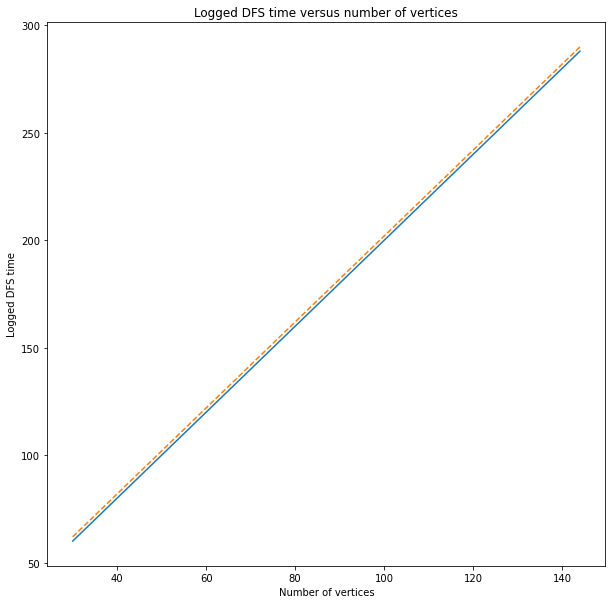

In [355]:
X = [x*3 for x in range(10,50,2)]
f = [2*x+2 for x in X]
plt.figure(figsize=(10,10))
plt.plot(X,times)
plt.plot(X,f, linestyle='--')
plt.title("Logged DFS time versus number of vertices")
plt.xlabel("Number of vertices")
plt.ylabel("Logged DFS time")